# Principal Component Analysis PCA

Too many features can make the ML model too complicated or overfitted. Somethimes we need to reduce the dimension of the feature space. There are many ways to achieve __dimensionality reduction__, but most of these techniques fall into one of two classes:
- __Feature Elimination__ - removing some of the features, which we find less informative or correlated with each other
- __Feature Extraction__ - reducing the dimensionality, while preserving as much ‘variability’ (i.e. statistical information) as possible

### Principal component analysis
Principal component analysis, or __PCA__, is a statistical technique for feature extraction, converting
high dimensional data to low dimensional data by __selecting the most important features__, which provide maximum information about the dataset. <br>

With PCA we replace the existing features with a set of new features. The new features are calculated as linear functions of the old ones, while trying to maximize the __variance__, which they cause in the output.<br>

Once the new features are calculated, we sort the new features by their importance (contribution to the variance), keep the most important and remove the least important.
<br><br>

The features we select to build the ML model with are the __principal components__<br>
- the feature that causes highest variance is the first principal component (see the figure below)
- the feature that is responsible for second highest variance is considered the second principal component, and so on. <br><br>

> Principal components do not have any correlation with each other.<br>
> PCA works best on normalized features.<br>
> PCA requires numeric data only.

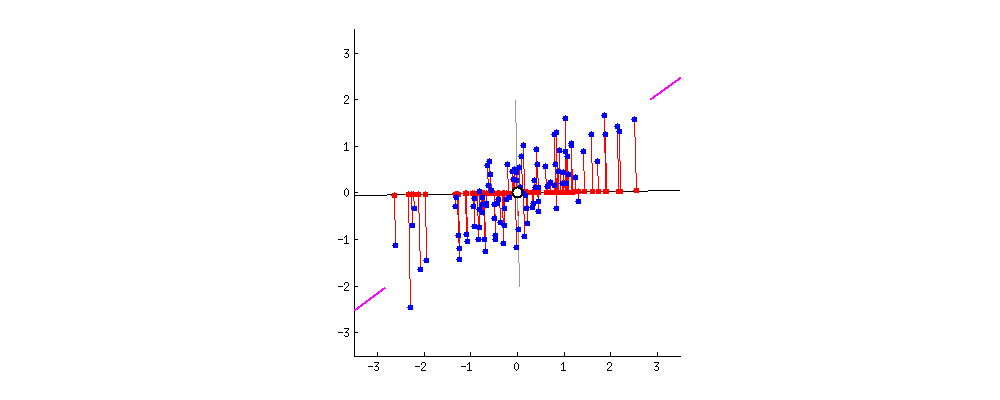

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Among all possible lines, the one that keeps projections to most points is the pink one - it will be the first principal component, PC.<br>
The second PC is the next best, so is the third, and so on.<br>

Therefore, the  first PC contains most information and has to stay, while the last one is the least informative and can be dismissed.


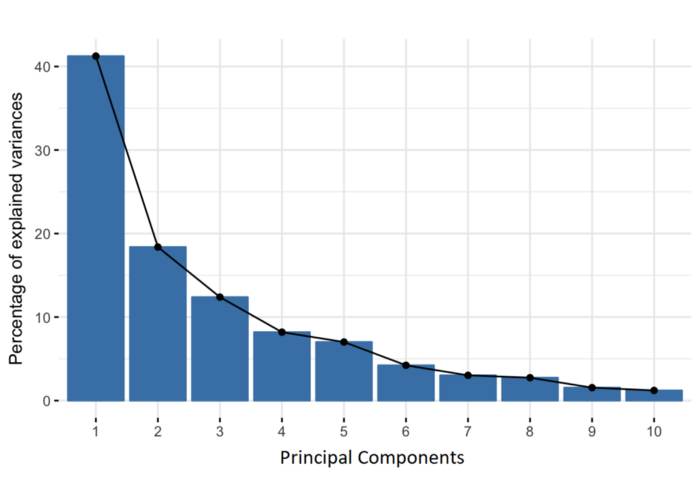

### Loss Functions

We have different methods for estimation of the error, while searching for principal components.
- L1 - Least Absolute Deviation - tries to minimize the sum of the distances of all points to the line
- L2 - Least Squared Deviation  - tries to minimize the sum of the square of distances of all points to the line

We will apply PCA in clustering sales data from the file _sales.csv_.

## Step 1: Environment

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep

## Step 2: Data Preparation

In [4]:
# Load data from a file
X = pd.read_csv('/Users/tdi/Documents/Teaching/AI/2020/Data/sales.csv')

In [5]:
X.shape

(440, 7)

In [6]:
X.head()

,Store id,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater
0,1,12449,8735,7351,203,2528,1269
1,2,6528,10103,9835,1664,3411,1737
2,3,6231,9223,8083,2631,3774,7394
3,4,13502,1089,4174,6478,468,1811
4,5,24078,5067,7902,3714,1932,5360


In [7]:
# Remove first column
X = X.drop(['Store id'], axis=1)
X.head()

,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater
0,12449,8735,7351,203,2528,1269
1,6528,10103,9835,1664,3411,1737
2,6231,9223,8083,2631,3774,7394
3,13502,1089,4174,6478,468,1811
4,24078,5067,7902,3714,1932,5360


In [8]:
# Convert data frame to array
X = X.values
X

array([[12449,  8735,  7351,   203,  2528,  1269],
       [ 6528, 10103,  9835,  1664,  3411,  1737],
       [ 6231,  9223,  8083,  2631,  3774,  7394],
       ...,
       [13302, 15463, 29256,   416, 15433,  2041],
       [10004,  1989,  2282,  1027,   160,  2022],
       [ 2550,  1670,  2510,    69,   462,    55]])

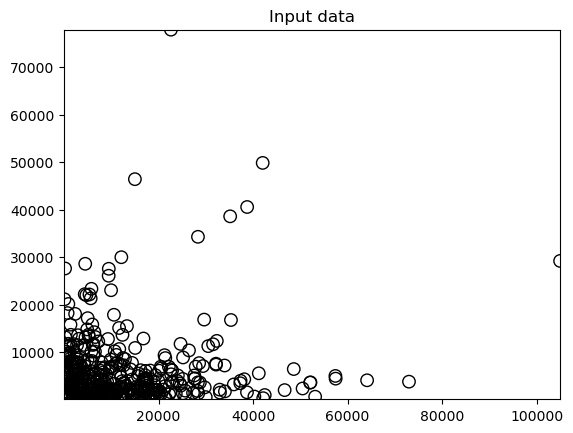

In [9]:
# Plot the data
plt.figure()
plt.title('Input data')

# calculate the range of coordinates
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the points
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')

plt.show()

### 2.1 Data Normalization

We rescale the row data (vectors with at least one non zero component), keeping proportions between elements comparable and resistant to outliers:   __xi/sqrt( xi²+yi²+zi²)__<br>

__Each sample__ (a row in the data matrix) is rescaled __independently__ of other samples so that its norm (l1 or l2 below) equals one.<br>

In [10]:
# Method L1: Least Absolute Deviation
# if we add the normalized values in each row, the sum of the new values is always 1
nl1 = prep.normalize(X, norm='l1')
nl1

array([[0.38263409, 0.2684801 , 0.22594129, 0.00623943, 0.07770094,
        0.03900415],
       [0.19616563, 0.30359397, 0.2955406 , 0.050003  , 0.10250015,
        0.05219665],
       [0.16688987, 0.247027  , 0.21649346, 0.07046818, 0.10108207,
        0.19803943],
       ...,
       [0.17523152, 0.20369907, 0.38539869, 0.0054801 , 0.20330387,
        0.02688675],
       [0.57218028, 0.11376115, 0.13051933, 0.05873942, 0.00915122,
        0.11564859],
       [0.34855112, 0.22826681, 0.34308365, 0.00943138, 0.06314926,
        0.00751777]])

In [11]:
# Method L2: Least Squared Deviation 
# if we square each element in the vector (row), and summed them, the sum would equal 1
nl2 = prep.normalize(X, norm='l2')
nl2

array([[0.72683521, 0.50999322, 0.42918834, 0.01185216, 0.14759735,
        0.0740906 ],
       [0.40576055, 0.62797163, 0.61131357, 0.10342916, 0.21201734,
        0.10796662],
       [0.38272364, 0.56649977, 0.49647812, 0.16160261, 0.23180854,
        0.45415801],
       ...,
       [0.34181062, 0.39734007, 0.75176752, 0.01068961, 0.39656919,
        0.05244591],
       [0.93526998, 0.18595082, 0.21334327, 0.09601382, 0.01495834,
        0.18903598],
       [0.64126384, 0.41996495, 0.6312048 , 0.01735185, 0.11618192,
        0.01383118]])

We replace the original data set with the any one of these new arrays and continue with the next data preparation procedures.

### 2.2 Data Scaling
Scaling makes the __values of the different features comparable__.

#### Standard Scaler

Standard features scaling transform the data, so that the distribution will have a mean=0 and a standard deviation=1<br> __(xi–mean(x))/stdev(x)__<br>
See the illustration below.<br>
The __Standard Scaler__ assumes that the data is normally distributed (follows a __Gaussian distribution__).

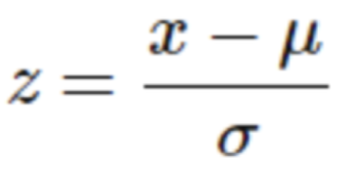
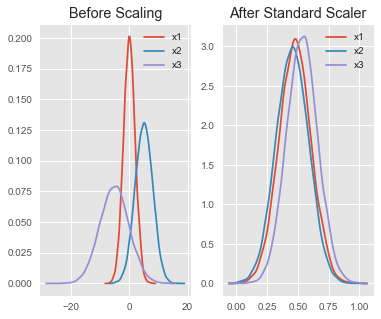<br>
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X = sc.fit_transform(X)  
X

array([[ 0.03926261,  0.39678755, -0.06800454, -0.57274876, -0.07465616,
        -0.0885001 ],
       [-0.43604036,  0.582205  ,  0.19094665, -0.28062752,  0.11187981,
         0.07022706],
       [-0.45988177,  0.46293061,  0.00830475, -0.08727965,  0.18856447,
         1.98885857],
       ...,
       [ 0.10773642,  1.30869441,  2.21554051, -0.53016024,  2.65155742,
         0.17333188],
       [-0.15700757, -0.51755902, -0.59643594, -0.40799318, -0.57490209,
         0.16688783],
       [-0.75537075, -0.56079598, -0.57266748, -0.59954154, -0.51110383,
        -0.50024107]])

#### Min-Max Scaler

Min-Max Scaler uses the following formula for calculating each feature: __(xi–min(x))/ (max(x)–min(x))__<br>
By default, the data is transformed into a range [0, 1] or [-1, 1], if there are negative values).
See the illustration below.<br>
Can be used instead of Standard Scaler for __non-Gaussian distributions__.

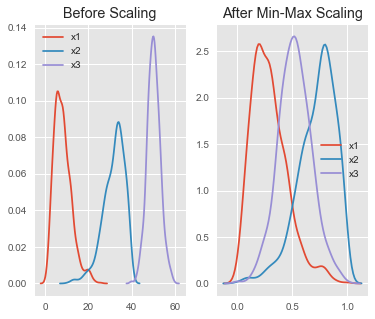<br>
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

### 2.3 PCA and Feature Selection

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(X)
pca_data

array([[ 0.09418236, -0.31341963, -0.16855727, -0.43531745],
       [ 0.48310922, -0.37226479,  0.32395653, -0.16778903],
       [ 0.81860114,  0.71042034,  1.35357856, -1.13223358],
       ...,
       [ 3.4907928 , -0.98672256, -0.61727117,  0.06094088],
       [-0.92705402, -0.07501534,  0.23093141, -0.50088564],
       [-1.08665162, -0.87620531,  0.33017113, -0.12462962]])

In [29]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pcadf

,pc 1,pc 2,pc 3,pc 4
0,0.094182,-0.313420,-0.168557,-0.435317
1,0.483109,-0.372265,0.323957,-0.167789
2,0.818601,0.710420,1.353579,-1.132234
3,-0.810149,0.650620,0.172743,0.352484
4,0.173562,1.307614,-0.091923,-0.879141
...,...,...,...,...
435,0.731018,2.165603,-0.632936,0.866223
436,-0.930188,1.663269,-1.412929,-0.557592
437,3.490793,-0.986723,-0.617271,0.060941
438,-0.927054,-0.075015,0.230931,-0.500886


In [30]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.43808353, 0.28055977, 0.12184598, 0.09755371])

It can be seen that first principal component is responsible for 43.80% variance. Similarly, the second principal component causes 28.05% variance in the dataset. 

/var/folders/vm/wbcfv4bn6fvggqz29dlb30xw0000gr/T/ipykernel_18741/1047061413.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


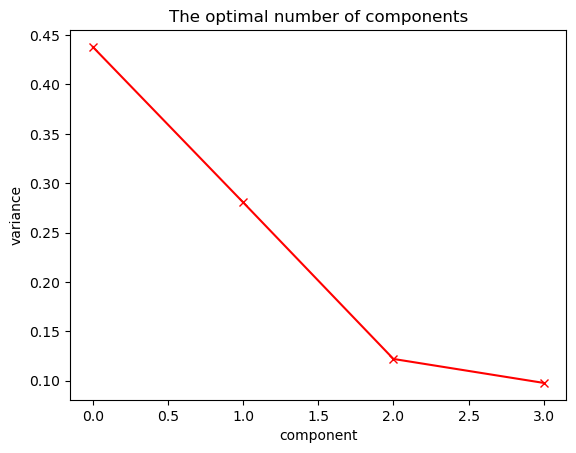

In [31]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

/var/folders/vm/wbcfv4bn6fvggqz29dlb30xw0000gr/T/ipykernel_18741/1148483022.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


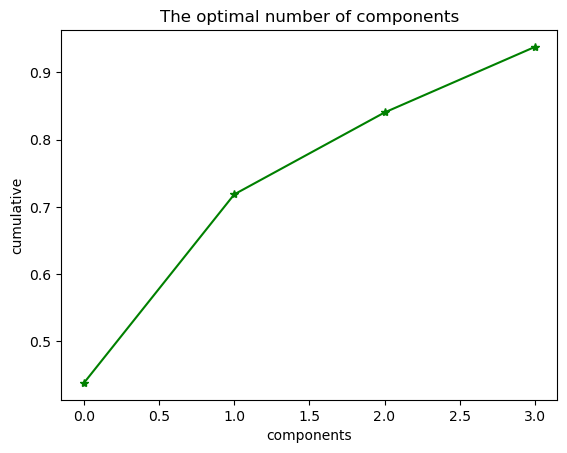

In [32]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

## Your Task: Experiment with different number of principal components

### Observe the effect of the components

## See More
https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1